# Stack Overflow Developer Survey

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


# Question 1: What is the level of education and undergraduate major of the respondents?

In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


C:\Users\arezg\AppData\Local\Temp\ipykernel_26368\1945851398.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_maj, rotation=90);


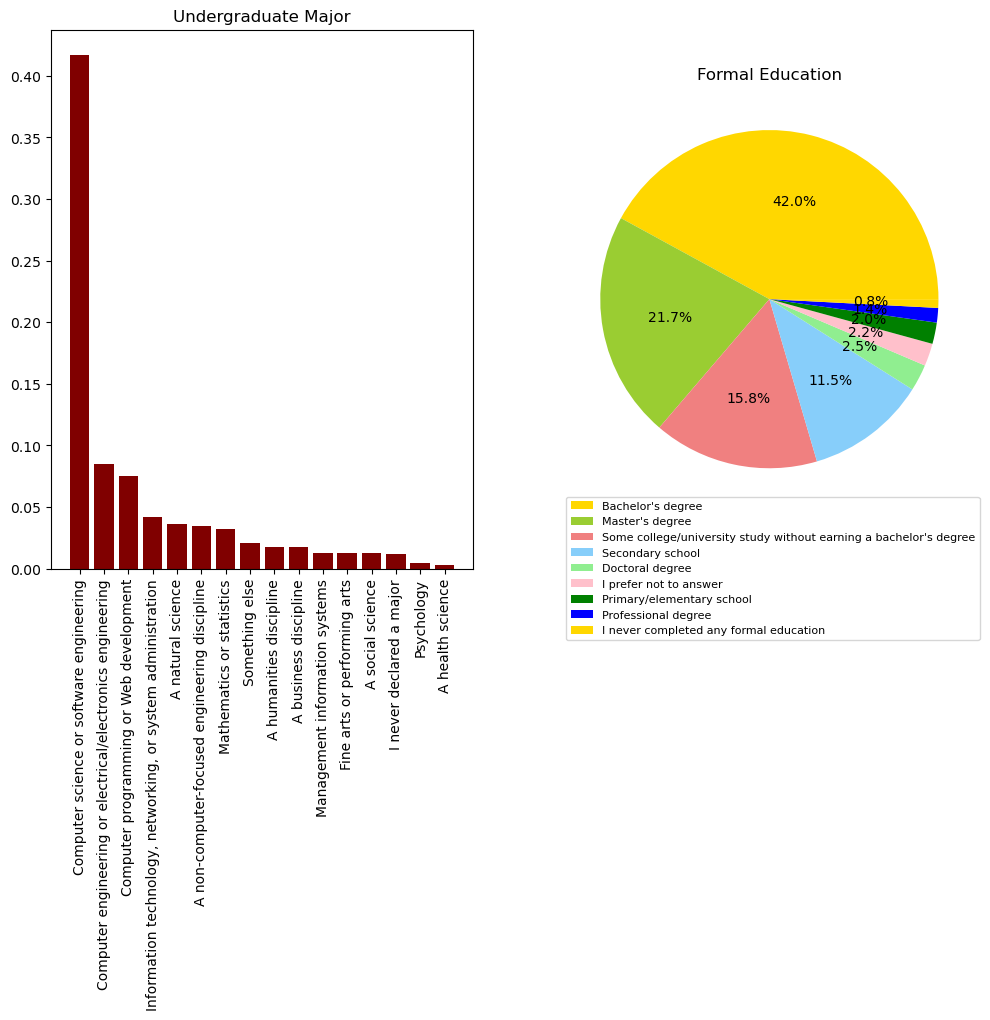

In [7]:
maj_vals = df['MajorUndergrad'].value_counts() #Provide a pandas series of the counts for each FormalEducation status
ed_vals = df['FormalEducation'].value_counts() #Provide a pandas series of the counts for each FormalEducation status

## Plotting
x_maj = maj_vals.index
y_maj = maj_vals.values/df.shape[0]

x_ed = ed_vals.index
y_ed = ed_vals.values/df.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

ax1.bar(x_maj, y_maj, color ='maroon')
ax1.set_xticklabels(x_maj, rotation=90);
ax1.set_title('Undergraduate Major')

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'green', 'blue'] 
labels = ['', '', '', '', '','','','','']
ax2.pie(ed_vals, colors=colors, labels=labels, autopct='%1.1f%%')
ax2.set_title('Formal Education')
ax2.legend(labels=x_ed, fontsize="8", loc="lower left", bbox_to_anchor=(0.55,0), bbox_transform=plt.gcf().transFigure)

We can see that most of the respondents have bachelor's degree with major in computer science or software engineering

In [8]:
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

# Question 2: Is job satisfaction related to undergraduate major and level of education?

In [9]:
major_under_grp = df.groupby('MajorUndergrad')
major_satisfaction = major_under_grp['JobSatisfaction'] #.mean().sort_values(ascending=False)

ed_grp = df.groupby('FormalEducation')
ed_satisfaction = ed_grp['JobSatisfaction'] #.mean().sort_values(ascending=False)

# ed_satisfaction.groups

ed_sat = []
ed_sat_labels = []

for group in ed_satisfaction.groups:
    ed_sat.append(ed_satisfaction.get_group(group).dropna())
    ed_sat_labels.append(group)

    
maj_sat = []
maj_sat_labels = []

for group in major_satisfaction.groups:
    maj_sat.append(major_satisfaction.get_group(group).dropna())
    maj_sat_labels.append(group)
    

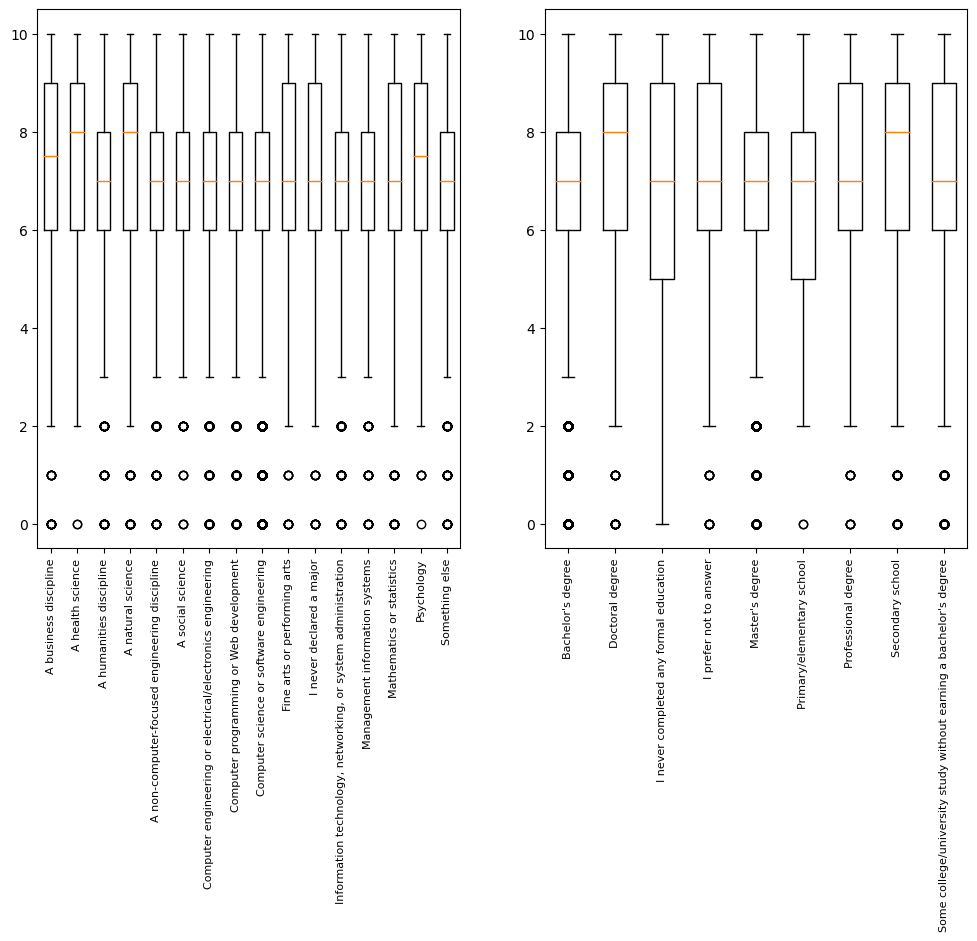

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

ax1.boxplot(maj_sat);
ax1.set_xticklabels(maj_sat_labels, rotation=90, fontsize=8);

ax2.boxplot(ed_sat);
ax2.set_xticklabels(ed_sat_labels, rotation=90, fontsize=8);



From the above figure, it can be seen that level of education and major do not have strong impact on the job satisfacton. So, let's see if thjey impact on the salary.

# Question 3: Is salary related to undegraduate major and level of education?

In [11]:
major_under_grp = df.groupby('MajorUndergrad')
major_sal = major_under_grp['Salary'].mean().sort_values(ascending=False)

ed_grp = df.groupby('FormalEducation')
ed_sal= ed_grp['Salary'].mean().sort_values(ascending=False)

C:\Users\arezg\AppData\Local\Temp\ipykernel_26368\3107756577.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_maj, rotation=90);
C:\Users\arezg\AppData\Local\Temp\ipykernel_26368\3107756577.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_ed, rotation=90);


Text(0.5, 1.0, 'Salary versus level of education')

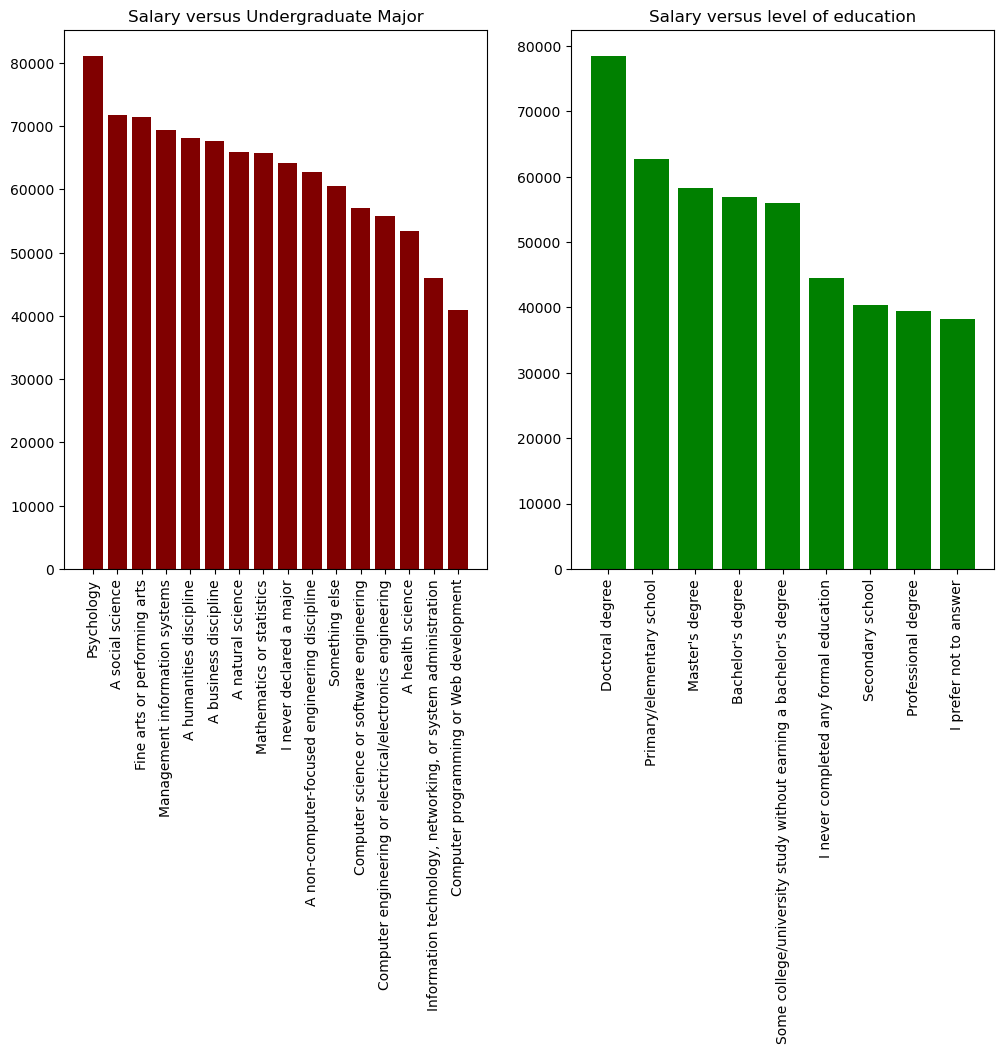

In [12]:
x_maj = major_sal.index
y_maj = major_sal.values

x_ed = ed_sal.index
y_ed = ed_sal.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

ax1.bar(x_maj, y_maj, color ='maroon')
ax1.set_xticklabels(x_maj, rotation=90);
ax1.set_title('Salary versus Undergraduate Major')

# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'green', 'blue'] 
# labels = ['', '', '', '', '','','','','']
# ax2.pie(ed_sal, colors=colors, labels=labels, autopct='%1.1f%%')
# ax2.set_title('Salary versus Formal Education')
# ax2.legend(labels=x_ed, fontsize="8", loc="lower left", bbox_to_anchor=(0.55,0), bbox_transform=plt.gcf().transFigure)

ax2.bar(x_ed, y_ed, color ='green')
ax2.set_xticklabels(x_ed, rotation=90);
ax2.set_title('Salary versus level of education')



It is obvious that having a PhD degree can lead to developer job with higher salary, particularly in pysocholgy and social sciences. 

# Conclusion

- The results for over 19000 respondents show that job satisfaction is not related to level of education: either you have a PhD or bachelors or high-school degree can result in very high or very low level of job satisfaction, which is interesting.
- On the other hand, these factors (level of education and major) do impact on the salary. PhD employees have the highest salary in general although it does not bring very high level of job satisfaction.
- Although there are relatively small groups of people from psychology and social sciences, they have the highest salary with good level of job satisfaction.
    